# **Heart Failure Analysis**



---
---



**Exploratory Data Analysis**

In [81]:
#import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

In [72]:
df=pd.read_csv("/content/Heart Datasert/heart_failure_clinical_records_dataset.csv")
print("Number of Missing values in each coloumn")
df.isnull().sum()

Number of Missing values in each coloumn


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [73]:
print("DataType and Non-Null value count")
df.info()

DataType and Non-Null value count
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory

In [74]:
print("Unique Values in each column")
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f"{column}: {num_unique_values}")

Unique Values in each column
age: 47
anaemia: 2
creatinine_phosphokinase: 208
diabetes: 2
ejection_fraction: 17
high_blood_pressure: 2
platelets: 176
serum_creatinine: 40
serum_sodium: 27
sex: 2
smoking: 2
time: 148
DEATH_EVENT: 2


In [75]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Classification of Binary Varibales

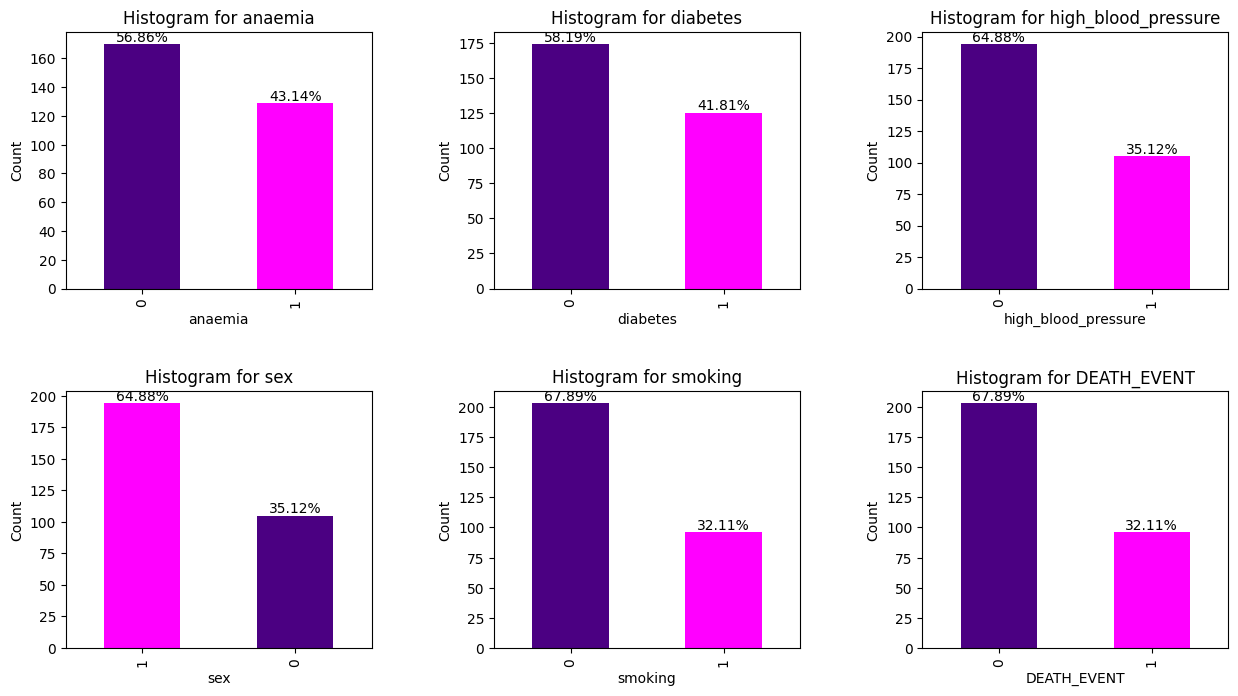

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

# Define the color for each unique value across all subplots
color_dict = {0: 'indigo', 1: 'magenta'}

for i, var in enumerate(categorical_vars):
    row, col = i // 3, i % 3
    counts = df[var].value_counts()

    # Assign a color based on the unique values of the variable
    color_list = [color_dict[value] for value in counts.index]

    counts.plot(kind='bar', ax=axes[row, col], color=color_list)
    axes[row, col].set_title(f'Histogram for {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Count')

    total = len(df)
    for j, count in enumerate(counts):
        percentage = count / total * 100
        axes[row, col].text(j, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


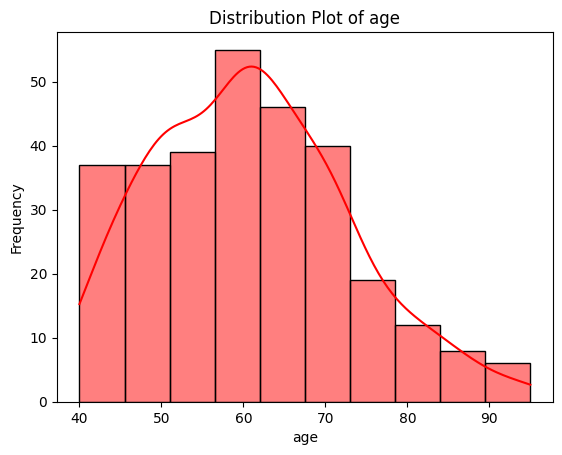

In [129]:


# Assuming df is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'age'

# Create a distribution plot
sns.histplot(df[column_name], kde=True, color='red')

# Set labels and title
plt.title(f'Distribution Plot of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')

# Show the plot
plt.show()


<ipython-input-137-3716bb90ff90>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=df, palette='Set1', notch=True)


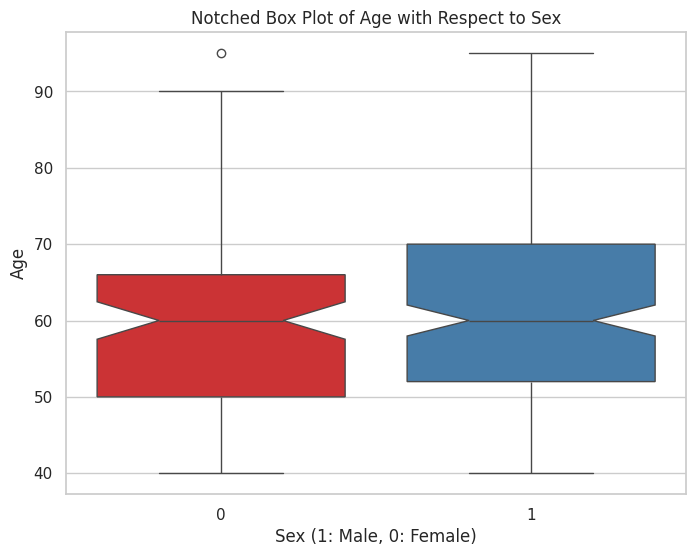

In [137]:
# Create a notched box plot of age with respect to sex
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.boxplot(x='sex', y='age', data=df, palette='Set1', notch=True)

# Customize the plot
plt.xlabel('Sex (1: Male, 0: Female)')
plt.ylabel('Age')
plt.title('Notched Box Plot of Age with Respect to Sex')

# Show the plot
plt.show()

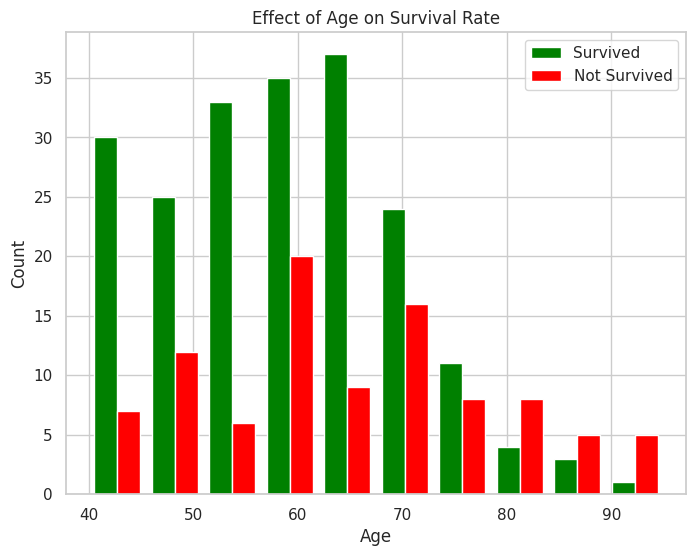

In [136]:

# Data
survived = df[df["DEATH_EVENT"] == 0]["age"]
not_survived = df[df["DEATH_EVENT"] == 1]["age"]
hist_data = [survived, not_survived]
group_labels = ['Survived', 'Not Survived']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(hist_data, color=['green', 'red'], label=group_labels)

# Customize the plot
plt.title('Effect of Age on Survival Rate')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()



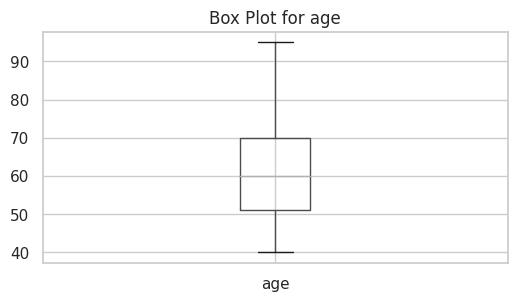

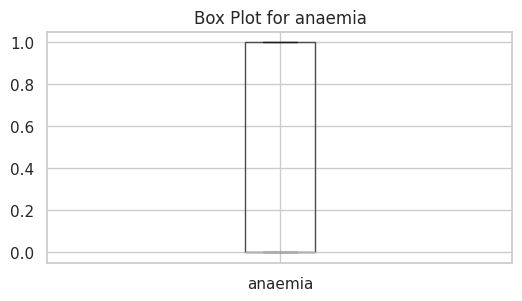

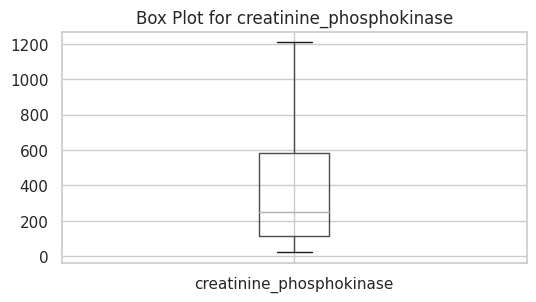

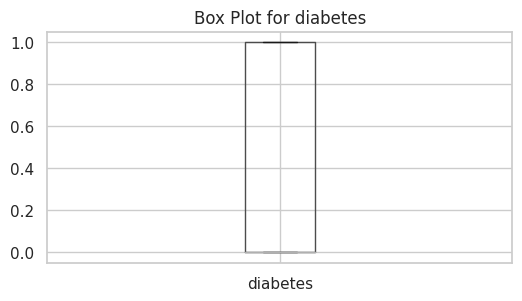

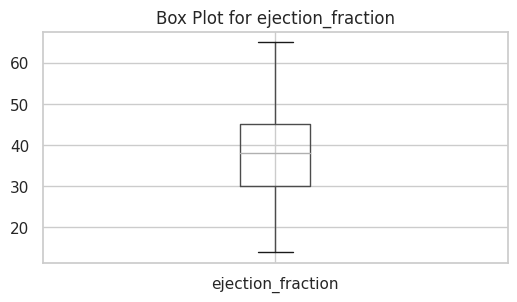

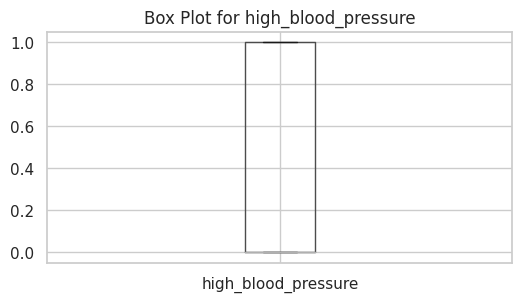

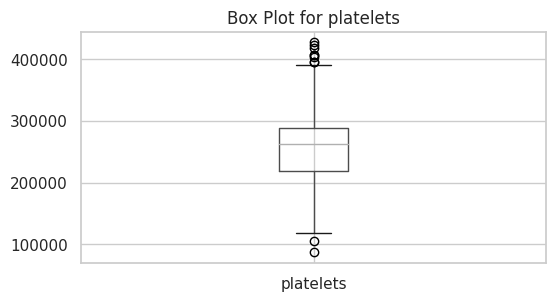

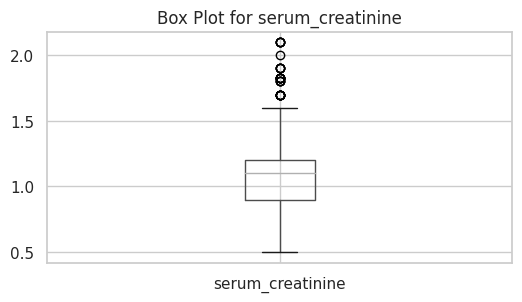

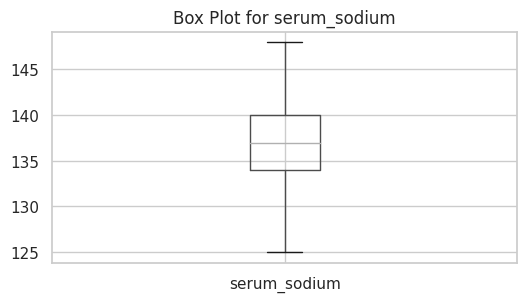

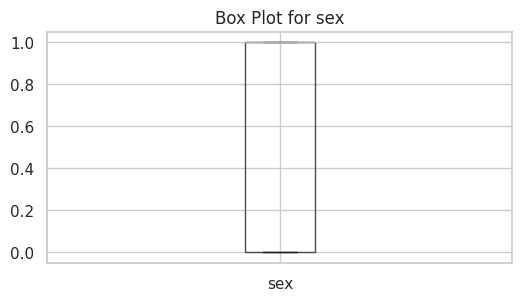

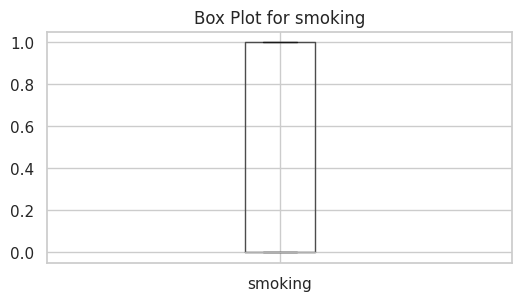

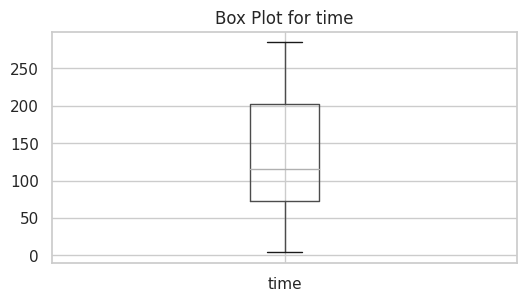

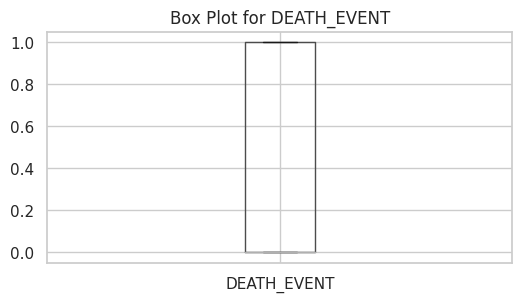

In [164]:
for column in df.columns:
    # Create a box plot for the current column
    plt.figure(figsize=(6, 3))  # Set the desired figure size
    plt.title(f'Box Plot for {column}')
    df.boxplot(column=column)
    plt.show()

In [ ]:
# Define the columns for which you want to find outliers
columns_to_check = ['serum_creatinine', 'serum_sodium', 'ejection_fraction','platelets','creatinine_phosphokinase']

for column_name in columns_to_check:
    # Calculate the IQR (Interquartile Range)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers for the current column
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)][column_name]

    # Print the outliers for the current column
    print(f"Outliers for {column_name}:")
    print(outliers)
    print(f"Total number of outliers for {column_name}: {len(outliers)}")
    print()


In [ ]:
# Initialize a dictionary to store upper bounds
ds1=['serum_creatinine','serum_sodium','ejection_fraction','platelets','creatinine_phosphokinase']
upper_bounds = {}

# Calculate upper bounds for each variable
for variable in ds1:
    Q1 = np.percentile(df[variable], 25)
    Q3 = np.percentile(df[variable], 75)
    IQR = Q3 - Q1
    threshold = 1.5
    upper_bound = Q3 + threshold * IQR
    upper_bounds[variable] = upper_bound

# Print upper bounds for each variable
for variable, upper_bound in upper_bounds.items():
    print(f"Upper Bound for {variable}: {upper_bound}")

In [153]:
def treat_outliers(df, variable_name, threshold=1.5, treat_lower=True, treat_upper=True):
    variable = df[variable_name]
    Q1 = np.percentile(variable, 25)
    Q3 = np.percentile(variable, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    treated_data = variable.copy()

    if treat_lower:
        treated_data = np.where(variable < lower_bound, np.median(variable), treated_data)

    if treat_upper:
        treated_data = np.where(variable > upper_bound, np.median(variable), treated_data)

    return treated_data

In [154]:
df['creatinine_phosphokinase']=treat_outliers(df,'creatinine_phosphokinase')
df['ejection_fraction']=treat_outliers(df,'ejection_fraction')
df['platelets']=treat_outliers(df,'platelets')
df['serum_creatinine']=treat_outliers(df,'serum_creatinine')
df['serum_sodium']=treat_outliers(df,'serum_sodium')

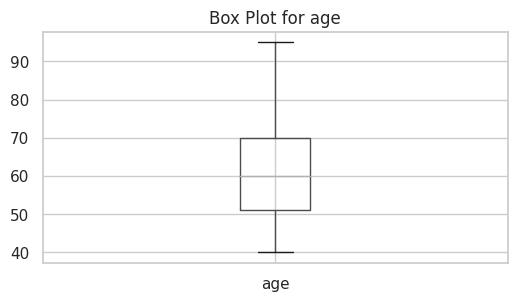

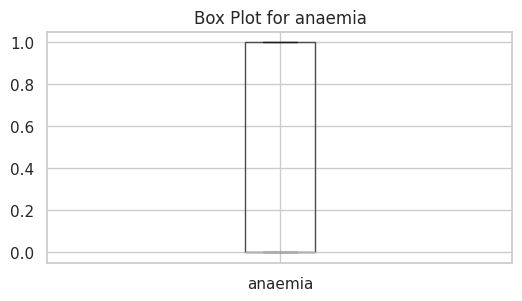

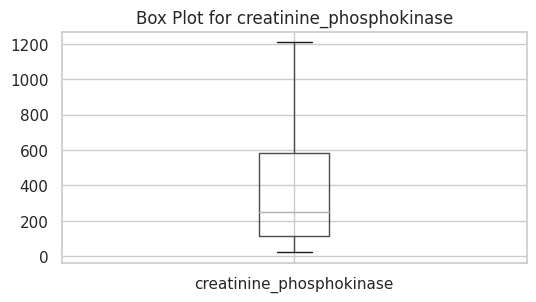

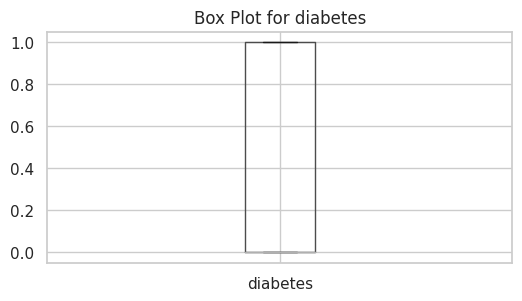

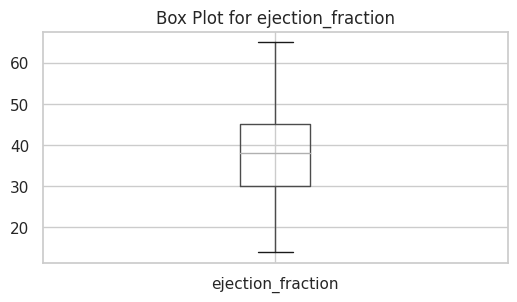

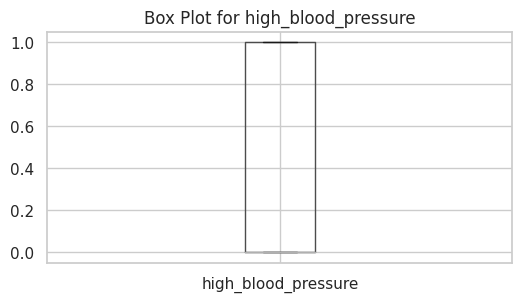

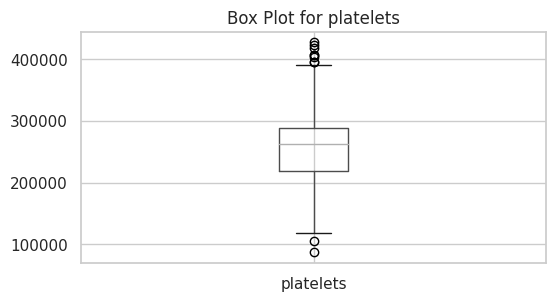

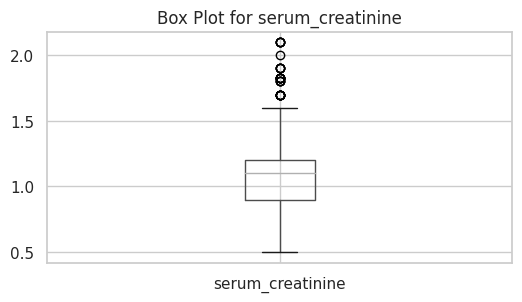

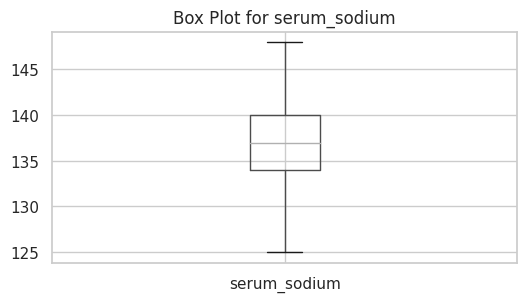

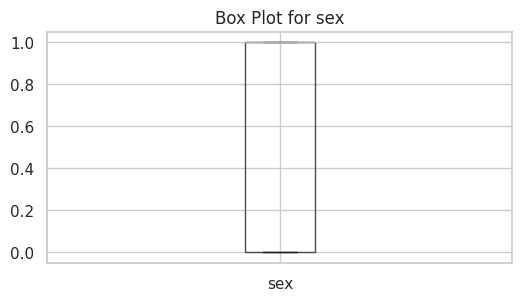

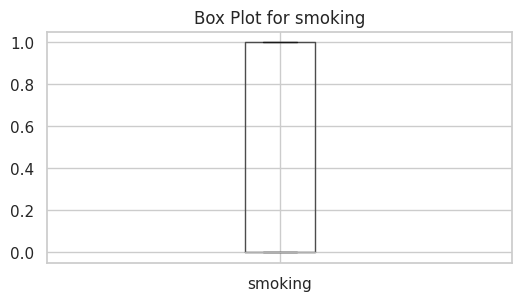

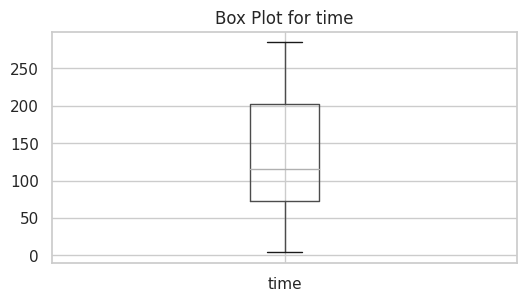

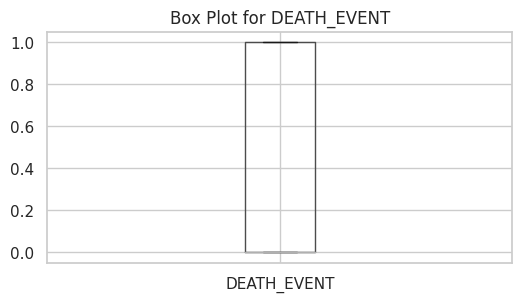

In [163]:
for columns in df.columns:
    # Create a box plot for the current column
    plt.figure(figsize=(6, 3))  # Set the desired figure size
    plt.title(f'Box Plot for {columns}')
    df.boxplot(column=columns)
    plt.show()

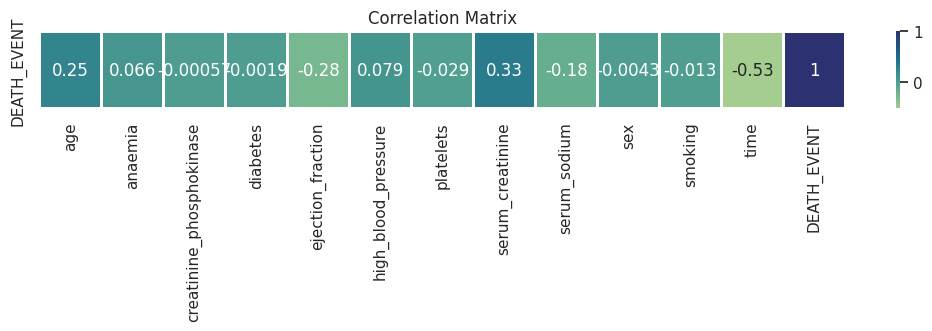

In [158]:
correlation_matrix = df.corr().tail(1)
fig, ax = plt.subplots(figsize=(13, 1))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=1 ,ax=ax)
plt.title('Correlation Matrix')
plt.show()

In [157]:
corr_with_death_event = df.corr()['DEATH_EVENT']
corr_with_death_event = corr_with_death_event[(corr_with_death_event.abs() > 0.2) & (corr_with_death_event.abs() != 1)]
print(corr_with_death_event)

age                  0.253729
ejection_fraction   -0.283244
serum_creatinine     0.327965
time                -0.526964
Name: DEATH_EVENT, dtype: float64


Final insight: 4 features : Age, ejection fraction, serum_creatinine and time, seem to be correlated to the dependent variable as compared to the other features, and hence relevant too.

Creating a new csv file with relevant faetures

In [162]:
# Assuming df is your original DataFrame
selected_features = ['age', 'ejection_fraction', 'serum_creatinine','time','DEATH_EVENT']  # Replace with your relevant feature names

# Create a new DataFrame with only the selected features
filtered_df = df[selected_features]

# Save the new DataFrame to a CSV file
filtered_df.to_csv('filtered_data.csv', index=False)
